Assignment is based on: http://neuralnetworksanddeeplearning.com/chap1.html <br\>
Code is taken from: https://github.com/MichalDanielDobrzanski/DeepLearningPython35

# Assignment 7 - Propose Your Own Assignment: Handwriting Detection

## Part A - Abstract

The purpose of this paper is to examine different neural networks and how effective they are at correctly classifying the handwritten digits 0-9. We use 6 different networks, with 3 runs of each. We find the most accuracy using a network with 4 layers, with 784, 80, 80, and 10 nodes in each layer respectively. We find, however, that results are fairly similar between networks which have more than 2 layers.

## Part B - Code Analysis

Here we will investigate each section of code that creates this neural network and interpret its meaning and utility.

In [97]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

The above sets up the Network object and initializes its variables. Each network has a set of biases and weights which we initialize randomly to begin. <br\>
When creating a Network object, you initialize using an array (sizes). The first element in sizes is the input layer (and therefore has no associated bias), and represents the number of input nodes that this network has. Each subsequent element that precedes the final element represents the number of sigmoids in the corresponding hidden layers of the network. The final element in sizes is the number of output sigmoid neurons.<br\>
The biases are in the form of a y x 1 array (vector) of random values between 0 and 1. This initializes the biases to have a random start point for Stochastic Gradient Descent. Each layer of the network (besides the input layer) has an associated bias.<br\>
The weights are in the form of a y x x matrix. Each column of weights in the matrix represents the weights connecting the associated vector with the one following it. 

In [98]:
def sigmoid(z):
    # this is the equation for the sigmoid function
    return 1.0/(1.0 + np.exp(-z))
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

The above is the sigmoid function and its derivative. sigmoid takes the input (which for our purposes will be $z = w \cdot a + b$) and applies the sigmoid function, which can be written as: 
$$ \sigma (z) \equiv \dfrac{1}{1 + e^{-z}} $$ With its derivative being the change in the sigmoid function.

In [99]:
    def feedforward(self, a):
        # returns the output for input a
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

The above is a function in the Network class. It calls the sigmoid function on the $z = w \cdot a + b$ step function to smooth out the graph and make the output vary from strictly 0 and 1.

In [100]:
    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""

        training_data = list(training_data)
        n = len(training_data)

        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)

        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {} : {} / {}".format(j,self.evaluate(test_data),n_test));
            else:
                print("Epoch {} complete".format(j))

The above is also a part of the Network class, and is the Stochastic Gradient Descent algoritm. Gradient descent is an algorithm that minimizes the cost function of w, b (i.e. gets us closer to the correct solution). Stochastic gradient descent speeds this up by using smaller, randomized mini-batches to determine how to update weights and biases in the next step. <br\>
Each Epoch is a training step in the algorithm <br\>
eta is the learning rate, a small constant that mainitains a downward trajectory for the algorithm (continually making change in C smaller). At the same time, eta affects the size of the change in each training step, so one that is too small would be ineffective as there would be very little change. 

In [101]:
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

The above is also part of the Network class. It uses backpropogation to update the weights and biases in the network based on a mini-batch.

In [102]:
def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    
    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                           for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)
    
    def cost_derivative(self, output_activations, y):
        return (output_activations-y)
    
        

IndentationError: unindent does not match any outer indentation level (<ipython-input-102-6d61b9b0d145>, line 31)

## Part C - Methods

We will now use this code and training data from the MNIST data set to create a neural network that can correctly identify hadwritten digits 0-9. For our data, the images of digits are 28x28 pixels in dimension and there are 10 possible types of digit (0-9). Therefore the input layer should always have 28 * 28 = 784 input neurons (one for each pixel) and 10 output neurons (one to represent each digit from 0 to 9).

### i. Two-Layer Network

In our first pass, we try a network with just an input layer and an output layer:

In [103]:
# net = network.Network([784, 10])

We then perform Stochastic Gradient Descent on the network using 10 epochs, a learning rate of 0.05, and a mini-batch size of 20:

In [104]:
# net.SGD(training_data, 10, 20, .05, test_data=test_data)

After performing this 3 times, we take the best run which is:

Epoch 0 : 2885 / 10000  
Epoch 1 : 3645 / 10000  
Epoch 2 : 4048 / 10000  
Epoch 3 : 4485 / 10000  
Epoch 4 : 4879 / 10000  
Epoch 5 : 5278 / 10000  
Epoch 6 : 5568 / 10000  
Epoch 7 : 5711 / 10000  
Epoch 8 : 5826 / 10000  
Epoch 9 : 5900 / 10000  

Next we try doubling the epochs to see if more iterations gets us closer, we also up the learning rate.

In [105]:
# net.SGD(training_data, 20, 20, 1.0, test_data=test_data)

Best of 3 runs is:

Epoch 0 : 4238 / 10000  
Epoch 1 : 4913 / 10000  
Epoch 2 : 4938 / 10000  
...  
Epoch 17 : 6653 / 10000  
Epoch 18 : 6670 / 10000  
Epoch 19 : 6676 / 10000  

### ii. Three-Layer Network

Now we add another layer with 40 hidden neurons.

In [106]:
# net = network.Network([784, 40, 10])

We start with 20 epochs, a learning rate of 2.0, and a mini-batch size of 20.

In [107]:
# net.SGD(training_data, 20, 20, 2.0, test_data=test_data)

Best of 3 runs is:

Epoch 0 : 8758 / 10000  
Epoch 1 : 9029 / 10000  
Epoch 2 : 9147 / 10000  
...  
Epoch 17 : 9450 / 10000  
Epoch 18 : 9463 / 10000  
Epoch 19 : 9477 / 10000  

Now we try doubling the neurons in the hidden layer.

In [108]:
# net = network.Network([784, 80, 10])

We use the same epochs, learning rate, and mini-batch size as before.

In [109]:
# net.SGD(training_data, 20, 20, 2.0, test_data=test_data)

Best of 3 runs is:

Epoch 0 : 7117 / 10000  
Epoch 1 : 7364 / 10000  
Epoch 2 : 7463 / 10000  
...  
Epoch 17 : 9523 / 10000  
Epoch 18 : 9525 / 10000  
Epoch 19 : 9513 / 10000  

### iii. Four-Layer Network

Now we try a 4 layer network with 2 40 neuron hidden layers.

In [110]:
# net = network.Network([784, 40, 40, 10])

Again we use the same epochs, learning rate, and mini-batch size as before.

In [111]:
# net.SGD(training_data, 20, 20, 2.0, test_data=test_data)

Best of 3 runs is:

Epoch 0 : 8856 / 10000  
Epoch 1 : 9132 / 10000  
Epoch 2 : 9260 / 10000  
...  
Epoch 17 : 9485 / 10000  
Epoch 18 : 9478 / 10000  
Epoch 19 : 9506 / 10000  

Finally, we try a 4 layer network with 2 80 neuron hidden layers.

In [112]:
# net = network.Network([784, 80, 80, 10])

Again we use the same epochs, learning rate, and mini-batch size as before.

In [113]:
# net.SGD(training_data, 20, 20, 2.0, test_data=test_data)

Best of 3 runs is:

Epoch 0 : 8061 / 10000  
Epoch 1 : 8263 / 10000  
Epoch 2 : 8372 / 10000  
...  
Epoch 17 : 9527 / 10000  
Epoch 18 : 9536 / 10000  
Epoch 19 : 9551 / 10000  

## Part D - Results

After trying 4 networks, our best result (by a slim margin) was the four-layer network with 784, 80, 80, and 10 nodes in each layer respectively. This outputted: 9551 / 10000 on its best run after 19 epochs. 

In [114]:
def setUpBars(worst_run, middle_run, best_run):
    n_groups = 5
    index = np.arange(n_groups)
    
    fig, ax = plt.subplots()

    bar_width = 0.25

    opacity = 0.4
    
    rects1 = plt.bar(index, worst_run, bar_width,
                 alpha=opacity,
                 color='r')

    rects2 = plt.bar(index + bar_width, middle_run, bar_width,
                 alpha=opacity,
                 color='b')

    rects2 = plt.bar(index + bar_width * 2, best_run, bar_width,
                 alpha=opacity,
                 color='g')

    
    plt.xticks(index + 3 * bar_width / 2, ('[784, 10]', '[784, 40, 10]', '[784, 80, 10]', 
                                   '[784, 40, 40, 10]', '[784, 80, 80, 10]'))
    
    

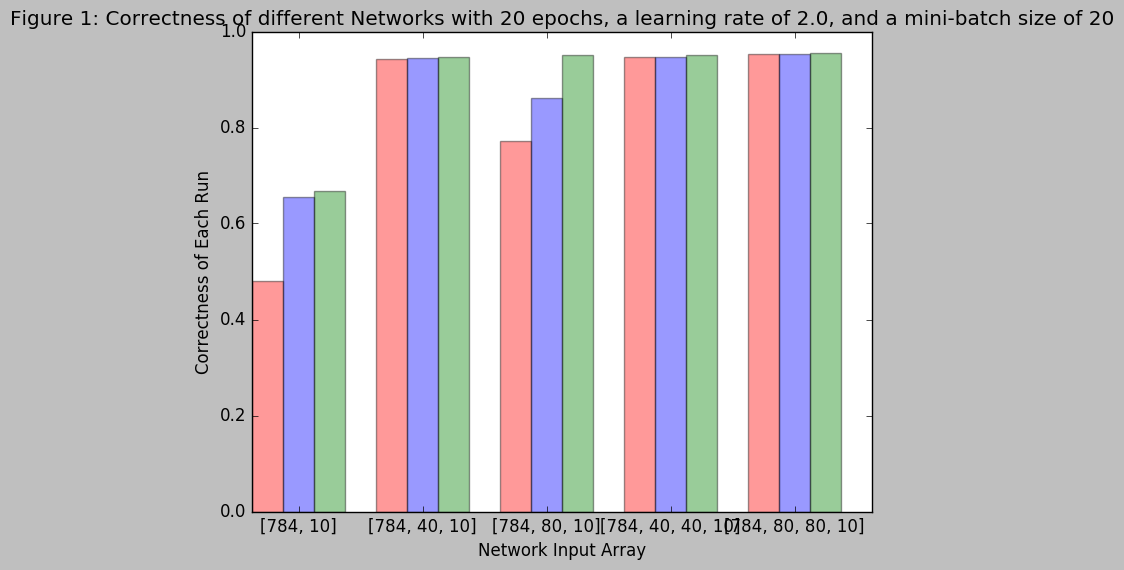

In [115]:
import numpy as np
import matplotlib.pyplot as plt

worst_run = (.4795, .9431, .7719, .9459, .9527)
middle_run = (.6560, .9452, .8609, .9467, .9527)
best_run = (.6676, .9477, .9513, .9506, .9551)

setUpBars(worst_run, middle_run, best_run)
plt.xlabel('Network Input Array')
plt.ylabel('Correctness of Each Run')
plt.title('Figure 1: Correctness of different Networks with 20 epochs, a learning rate of 2.0, and a mini-batch size of 20')
plt.show()   


Red represents worst run out of 3, blue represents middle, and green represents best.

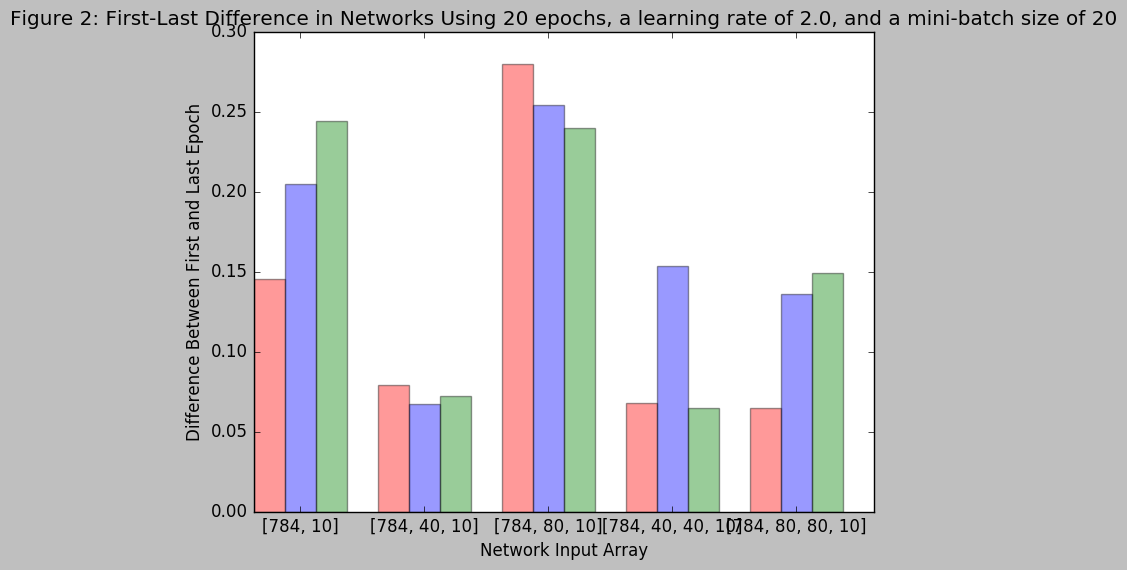

In [116]:
worst_run = (.4795 - .3343, .9431 - .8642, .7719 - .4922, .9459 - .8782, .9527 - .8882)
middle_run = (.6560 - .4511, .9452 - .8780, .8609 - .6071, .9467 - .7931, .9527 - .8170)
best_run = (.6676 - .4238, .9477 - .8758, .9513 - .7117, .9506 - .8856, .9551 - .8061)

setUpBars(worst_run, middle_run, best_run)
plt.xlabel('Network Input Array')
plt.ylabel('Difference Between First and Last Epoch')
plt.title('Figure 2: First-Last Difference in Networks Using 20 epochs, a learning rate of 2.0, and a mini-batch size of 20')
plt.show() 

Red represents worst run out of 3, blue represents middle, and green represents best.

# Part E - Discussion

From the small amount of data we have gathered, there seems to be two general observations.  
  
Firstly we consider differences of outcome based on number of layers in the network. We can see in Figure 1 that there is a significant difference between the network that uses just the input and output layers, and the networks that have hidden layers. This is to be expected because there is no bias assigned to the input layer. That said, it appears that there is very little difference between 3 and 4 layers of neurons. In fact, if we take just the best run of each, we get less than a 1% difference in the outcomes.  
  
Secondly we consider the difference of outcome based on number of nodes in each hidden layer. While the best of each run have less than a 1% difference, Figure 2 suggests that having one layer with 80 nodes had the most change from first epoch to last epoch. This suggests that additional epochs might separate this network from the others. At the same time, we see in Figure 1 that the network with one hidden layer containing 80 nodes appears to have the least consistency between runs by a large margin, when compared to the other networks with 3 or more layers, which have less than .1% variation between runs. While the one layer, 80 node network makes the most progress, its worst run is only slightly better than the two-layer network's best run. 

Unfortunately, we only have the data from 3 runs of each network. This means that the results are potentially misleading. If we want to make better supported claims, we should do additional runs. It would also be interesting to see if there are differences between networks with more extensive variation in number of nodes. For this small, contained experiment however, we have found some interesting outcomes. 

## Part F - References

Assignment is based on: http://neuralnetworksanddeeplearning.com/chap1.html <br\>
Code is taken from: https://github.com/MichalDanielDobrzanski/DeepLearningPython35